<div><h2><b><center>MANOJ KUMAR - 2048015</b></h2></div>
<div><h2><b><center>PCA v/s LDA - Chronic Kidney Disease</b></h2></div>

### Importing required Dataset & libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kidney_disease = pd.read_csv("kidney_disease.csv")
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

We were exploring the metadata of our dataset.
   - 25 columns with int, float, and Object datatypes
   - Some of the features do having Null values, so data preprocessing is required.

In [3]:
kidney_disease.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
id,0,1,2,3,4,5,6,7,8,9,10,11
age,48,7,62,48,51,60,68,24,52,53,50,63
bp,80,50,80,70,80,90,70,NaN,100,90,60,70
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,1.01,1.01
al,1,4,2,4,2,3,0,2,3,2,2,3
su,0,0,3,0,0,0,0,4,0,0,4,0
rbc,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal,NaN,abnormal
pc,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal,abnormal,abnormal
pcc,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,present,present
ba,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


We are transforming the data frame to help to get all the features vertically.
        
   - The collection of numerical and categorical values are seen.
   - 'rc','wc', and 'pcv' needs to be updated to float from Object. 

In [4]:
# '?' character remove process in the dataset
for i in ['rc','wc','pcv']:
    kidney_disease[i] = kidney_disease[i].str.extract('(\d+)').astype(float)
    
    
# Filling missing numeric data in the dataset with mean
for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    kidney_disease[i].fillna(kidney_disease[i].mean(),inplace=True)

In [5]:
# Removing tab spaces in the data
kidney_disease['dm'] = kidney_disease['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'}) 
kidney_disease['cad'] = kidney_disease['cad'].replace(to_replace='\tno',value='no') 
kidney_disease['classification'] = kidney_disease['classification'].replace(to_replace='ckd\t',value='ckd')

# Mapping the text to 1/0 and cleaning the dataset 
kidney_disease[['htn','dm','cad','pe','ane']] = kidney_disease[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
kidney_disease[['rbc','pc']] = kidney_disease[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
kidney_disease[['pcc','ba']] = kidney_disease[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
kidney_disease[['appet']] = kidney_disease[['appet']].replace(to_replace={'good':1,'poor':0})
kidney_disease['classification'] = kidney_disease['classification'].replace(to_replace={'ckd':1,'notckd':0})

kidney_disease.rename(columns={'classification':'class'},inplace=True)

In [6]:
kidney_disease.drop('id',axis=1,inplace=True)
kidney_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

We are customizing our features based on the pre-knowledge taken from the previous lab.
    
   - Value error 
   - Datatype error
   - Dropping unwanted features

In [7]:
# Filling the missing string data as the most repetitive (mod)
kidney_disease=kidney_disease.apply(lambda x:x.fillna(x.value_counts().index[0]))


features = kidney_disease.keys()
kidney_disease.head(12).T

,0,1,2,3,4,5,6,7,8,9,10,11
age,48.000000,7.000000,62.000000,48.000,51.000000,60.000,68.000000,24.000000,52.000000,53.00,50.000000,63.00
bp,80.000000,50.000000,80.000000,70.000,80.000000,90.000,70.000000,76.469072,100.000000,90.00,60.000000,70.00
sg,1.020000,1.020000,1.010000,1.005,1.010000,1.015,1.010000,1.015000,1.015000,1.02,1.010000,1.01
al,1.000000,4.000000,2.000000,4.000,2.000000,3.000,0.000000,2.000000,3.000000,2.00,2.000000,3.00
su,0.000000,0.000000,3.000000,0.000,0.000000,0.000,0.000000,4.000000,0.000000,0.00,4.000000,0.00
rbc,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,1.00,0.000000,1.00
pc,0.000000,0.000000,0.000000,1.000,0.000000,0.000,0.000000,1.000000,1.000000,1.00,1.000000,1.00
pcc,0.000000,0.000000,0.000000,1.000,0.000000,0.000,0.000000,0.000000,1.000000,1.00,1.000000,1.00
ba,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.00
bgr,121.000000,148.036517,423.000000,117.000,106.000000,74.000,100.000000,410.000000,138.000000,70.00,490.000000,380.00


Filling the missing string data as the most repetitive (mod)


### Pre-processed final dataset

In [8]:
dataset = kidney_disease

## Principal component Analysis - PCA

In [9]:
# distributing the dataset into two components X and Y 
X = dataset.iloc[:, 0:24].values 
y = dataset.iloc[:, 24].values 

# Splitting the X and Y into the Training set and Testing set 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

   - 0 to 23th column taken as X 
   - Classification(Target) feature taken as y

In [10]:
# performing preprocessing part 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 

X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

  - Normalization
  
Applying PCA function on training and testing set of X component 

In [11]:
# Applying PCA function on training and testing set of X component 
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 

X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 

explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.28935568, 0.07469401])

### Logistic Regression

In [12]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression 

Logistic_Regression = LogisticRegression(random_state = 0) 
Logistic_Regression.fit(X_train, y_train) 

LogisticRegression(random_state=0)

In [13]:
# Predicting the test set result using predict function under LogisticRegression 
Log_pred = Logistic_Regression.predict(X_test) 

# making confusion matrix between test set of Y and predicted value. 
from sklearn.metrics import confusion_matrix 

LogisticRegression_confusion_matrix = confusion_matrix(y_test, Log_pred) 
LogisticRegression_confusion_matrix

array([[28,  0],
       [ 1, 51]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


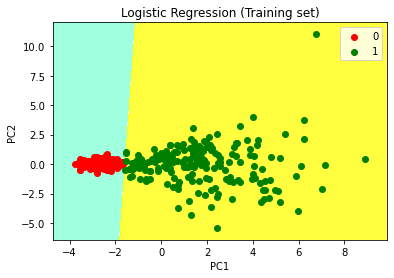

In [14]:
# Predicting the training set 
# result through scatter plot 
from matplotlib.colors import ListedColormap 

X_set, y_set = X_train, y_train 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                    stop = X_set[:, 0].max() + 1, step = 0.01), 
                    np.arange(start = X_set[:, 1].min() - 1, 
                    stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, Logistic_Regression.predict(np.array([X1.ravel(), 
            X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
            cmap = ListedColormap(('aquamarine', 'white', 'yellow'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

plt.title('Logistic Regression (Training set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() # to show legend 

# show scatter plot 
plt.show() 


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


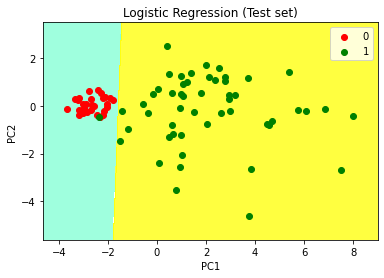

In [15]:
# Visualising the Test set results through scatter plot 
from matplotlib.colors import ListedColormap 

X_set, y_set = X_test, y_test 

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                    stop = X_set[:, 0].max() + 1, step = 0.01), 
                    np.arange(start = X_set[:, 1].min() - 1, 
                    stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, Logistic_Regression.predict(np.array([X1.ravel(), 
            X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, 
            cmap = ListedColormap(('aquamarine', 'white', 'yellow'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j) 

# title for scatter plot 
plt.title('Logistic Regression (Test set)') 
plt.xlabel('PC1') # for Xlabel 
plt.ylabel('PC2') # for Ylabel 
plt.legend() 

# show scatter plot 
plt.show() 

In [16]:
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

print("MAE: ",metrics.mean_absolute_error(y_test, Log_pred))
print("MSE: ",metrics.mean_squared_error(y_test,Log_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,Log_pred)))

MAE:  0.0125
MSE:  0.0125
RMSE:  0.11180339887498948


In [17]:
LogisticRegression_score = Logistic_Regression.score(X_test, y_test)
LogisticRegression_score

0.9875

### Decision Tree Regression Model

In [18]:
# Fitting the DecisionTreeRegressor model to the dataset
from sklearn.tree import DecisionTreeRegressor

DecisionTree_Regressor = DecisionTreeRegressor(random_state = 0)
DecisionTree_Regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
# Predicting a new result with the Decision Tree Regression
DT_pred = DecisionTree_Regressor.predict(X_test)

print("MAE: ",metrics.mean_absolute_error(y_test, DT_pred))
print("MSE: ",metrics.mean_squared_error(y_test, DT_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, DT_pred)))

MAE:  0.0125
MSE:  0.0125
RMSE:  0.11180339887498948


In [20]:
DecisionTree_confusion_matrix = confusion_matrix(y_test, DT_pred) 
DecisionTree_confusion_matrix

array([[28,  0],
       [ 1, 51]])

In [21]:
DecisionTree_score = DecisionTree_Regressor.score(X_test, y_test)
DecisionTree_score

0.945054945054945

### Random Forest Regression

In [22]:
# Fitting the RandomForestRegressor model to the dataset
from sklearn.ensemble import RandomForestRegressor

RandomForest_Regressor = RandomForestRegressor(random_state = 0)
RandomForest_Regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [23]:
# Predicting a new result with the RandomForestRegressor
RF_pred = RandomForest_Regressor.predict(X_test)

print("MAE: ",metrics.mean_absolute_error(y_test, RF_pred))
print("MSE: ",metrics.mean_squared_error(y_test, RF_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, RF_pred)))

MAE:  0.0125
MSE:  0.0125
RMSE:  0.11180339887498948


In [24]:
RandomForest_confusion_matrix = confusion_matrix(y_test, RF_pred) 
RandomForest_confusion_matrix

array([[28,  0],
       [ 1, 51]])

In [25]:
RandomForest_score = RandomForest_Regressor.score(X_test, y_test)
RandomForest_score

0.945054945054945

### Multiple Linear Regression


In [26]:
from sklearn.linear_model import LinearRegression

Multilinear_model=LinearRegression()
Multilinear_model.fit(X_train,y_train)

LinearRegression()

In [27]:
# Predicting a new result with the LinearRegression
ML_pred = Multilinear_model.predict(X_test)

print("MAE: ",metrics.mean_absolute_error(y_test, ML_pred))
print("MSE: ",metrics.mean_squared_error(y_test, ML_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, ML_pred)))

MAE:  0.2644836477908399
MSE:  0.09642933318410943
RMSE:  0.3105307282445804


In [28]:
Multilinear_score = Multilinear_model.score(X_test, y_test)
Multilinear_score

0.5761347991907277

### Support Vector Regression 

In [29]:
from sklearn.svm import SVR

SupportVectorRegression = SVR()
SupportVectorRegression.fit(X_train, y_train)

SVR()

In [30]:
SVR_pred = SupportVectorRegression.predict(X_test)

print("MAE: ",metrics.mean_absolute_error(y_test, SVR_pred))
print("MSE: ",metrics.mean_squared_error(y_test, SVR_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, SVR_pred)))

MAE:  0.09382720300781053
MSE:  0.02275556326645812
RMSE:  0.1508494722114006


In [31]:
SupportVector_score= SupportVectorRegression.score(X_test, y_test)
SupportVector_score

0.8999755460815028

#### PCA - Accuracy over different Regression model

In [41]:
print("Logistic Regression        \t: ", round(LogisticRegression_score*100, 2))
print("RMSE \t\t\t\t: ", round(np.sqrt(metrics.mean_squared_error(y_test, Log_pred)), 3))
print("\nDecision Tree Regression \t: ", round(DecisionTree_score*100, 2))
print("RMSE \t\t\t\t: ", round(np.sqrt(metrics.mean_squared_error(y_test, DT_pred)), 3))
print("\nRandom Forest Regression \t: ", round(RandomForest_score*100, 2))
print("RMSE \t\t\t\t: ", round(np.sqrt(metrics.mean_squared_error(y_test, RF_pred)), 3))
print("\nMultiple Linear Regression\t: ", round(Multilinear_score*100, 2))
print("RMSE \t\t\t\t: ", round(np.sqrt(metrics.mean_squared_error(y_test, ML_pred)), 3))
print("\nSupport Vector Regression\t: ", round(SupportVector_score*100, 2))
print("RMSE \t\t\t\t: ", round(np.sqrt(metrics.mean_squared_error(y_test, SVR_pred)), 3))

Logistic Regression        	:  98.75
RMSE 				:  0.112

Decision Tree Regression 	:  94.51
RMSE 				:  0.112

Random Forest Regression 	:  94.51
RMSE 				:  0.112

Multiple Linear Regression	:  57.61
RMSE 				:  0.311

Support Vector Regression	:  90.0
RMSE 				:  0.151


##### Principal Component Analysis (PCA)

   - 400 x 24 High-dimensional space was projected to 400 x 2 lower-dimensional sub-space without losing 
    
    
   - The accuracy of the Individual model differs based on our Feature selections.
   
   
   - Dimensionality reduction accuracy may differ from Correlation and other feature selection techniques in machine learning (Filter, Wrapper,  Embedded, Hybrid) 
   
   
   - Excluding Multiple-Linear Regression rest of all the Regression models having 90+ accuracy percentage.
   
   
    . Logistic Regression       :  98.75             
    . Decision Tree Regression 	:  94.51             
    . Random Forest Regression 	:  94.51            
    . Support Vector Regression	:  90.0    
    
    
   - Excluding Multiple-Linear Regression rest of all the Regression models having 90+ accuracy percentage.
   
   
   - Logistic, Decision Tree, Random Forest Regression giving best RMSE points.
   
   
   - PCA is boosting the accuracy values, n_components and dataset's are playing significant role